#Face Recognition
Face Recogniton is a form of biometrics, the science which deals with the automated recognition of individuals based on biological and behavioral characteristics. It is included in physiological or static biometrics, based on data derived from the measurement of a part of a person's anatomy.
The main purpose is the authentication of the subject, which follows identification and is based on proving the previously declared identity.
We will later discuss about the advantages and disadvantages of this mechanism, analysing the requirements for an ideal biometric identifier:
1. Universality
2. Uniqueness
3. Performance
4. Collectability
5. Acceptability

Face Recognition or Face Identification is: given the picture of the face of an unknown person, identify the name of the person by referring to a gallery of previously seen pictures of identified persons.


###About the dataset
Labeled Faces in the Wild (LFW) is an image dataset containing face photographs, collected especially for studying the problem of unconstrained face recognition. It includes over 13,000 images of faces collected from across the web. Here are key aspects of these images.

Each face in this data set was labeled with the person’s name in the image.
1680 of the photographed persons distinctly appear in two or more photos in the data set.
The faces in these images were detected by the Viola-Jones face detector (Paul Viola and Michael Jones, 2001).

LFW includes four different sets of images, including the original and three types of aligned images that can be used to test algorithms under different conditions. For alignment, the dataset uses funneled images (ICCV 2007), LFW-a, and deep funneled images (NIPS 2012). Deep funneled and LFW-a images produce superior results for most face verification algorithms over the funneled images and the original images.

Face Recognition is a task typically performed on the output of a model trained to perform Face Detection. The most popular model for Face Detection is called Viola-Jones and is implemented in the OpenCV library. The LFW faces were extracted by this face detector from various online websites.

###Purpose
Our first purpose is to train an image classifier to work on a dataset of well-known faces of famous people. Then we will make the neural network recognize further faces extending the dataset with new measurements linked to proper identity labels. The final objective is to make an app which recognize human faces after collecting data.

#Schedule
1. Exploratory Data Analysis 
2. Define the relevant metrics to be used
3. Train a first baseline algorithm as a reference
4. Prepare data where needed
5. Design experiments and define hyperparameters 
6. Repeat until performance on the test set is acceptable

###Exploratory Data Analysis 
* Regression or Classification?
We are obiouvsly dealing with a problem of classification of faces regarding their labels.

* What is the target variable?
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. A supervised machine learning algorithm uses historical data to learn patterns and uncover relationships between other features of your dataset and the target.
Targets are labeled in the dataset and consists in the identities associated with famous faces.

* Is the data unbalanced?
* What are the features? Correlation, ranges, variances, NaN, errors...
* Plot to make findings clearer


There are 5749 unique celebrities in the entire dataset, of whom 1680 are represented by multiple images. The entire number of images available is 13233. The most represented celebrity is George_W_Bush, with 530 unique images in the dataset.

###Define the relevant metrics to be used

###Train a first baseline algorithm as a reference
For classification, train basic models as the one-class-classifier and the basic logistic regression with all the features.

###Prepare data where needed
* Cleaning
* Normalization 
* Shuffling and train, test and validation set construction (check the statistical properties of the splits)

###Design experiments and define hyperparameters

###Repeat until performance on the test set is acceptable 
* Train model and cross validate hyperparameters until acceptable performance on training set is achieved
* Test best hyperparameter model and check if there is overfitting or underfitting



# Training an image classifier
We will do the following steps in order:
1. Load and normalize the training test datasets using ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function and an optimizer
4. Train the network on the training data 
5. Test the network on the test data 

In [ ]:
%matplotlib inline

In [ ]:
import torch 
import torchvision
import torchvision.transforms as transforms

###1. Load and normalize training test datasets
(The output of torchvision datasets are PILImage of range [0,1]. We transform them to Tensors of normalized range [-1,1].)

In [ ]:
#Training hyperparameters
INIT_LR = 0.001
BATCH_SIZE = 32
EPOCHS = 2

#Setting the device to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Loading the dataset
print("[INFO] Loading the LFW dataset...")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.LFWPeople(root='./data', split='train', 
                          transform = transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
print("[INFO] Trainset loaded.")
testset = torchvision.datasets.LFWPeople(root='./data', split='test',
                          transform = transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)
print("[INFO] Testset loaded.")

[INFO] Loading the LFW dataset...


  0%|          | 0/243346528 [00:00<?, ?it/s]

Extracting ./data/lfw-py/lfw-funneled.tgz to ./data/lfw-py


  0%|          | 0/66403 [00:00<?, ?it/s]

  0%|          | 0/94727 [00:00<?, ?it/s]

[INFO] Trainset loaded.
Using downloaded and verified file: ./data/lfw-py/lfw-funneled.tgz
Extracting ./data/lfw-py/lfw-funneled.tgz to ./data/lfw-py


  0%|          | 0/28334 [00:00<?, ?it/s]

Using downloaded and verified file: ./data/lfw-py/lfw-names.txt
[INFO] Testset loaded.


In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=1)
classes = list(lfw_people.target_names)
num_classes = len(classes)
print(num_classes)


5749


Alejandro Toledo          Luiz Inacio Lula da Silva Tom Reilly                Caroline Kennedy          Rita Wilson               Mark Sacco                Herb Sendek               Charlize Theron           
Bill Simon                Clay Aiken                Richard Armitage          Fernando Henrique Cardoso Saddam Hussein            Hans Corell               Jennifer Lopez            James Wattana             
Bob Graham                John Leguizamo            Colin Powell              Dwayne Williams           Kelsey Grammer            Patrice Chereau           Ari Fleischer             Peter Ahearn              
Hootie Johnson            Ramon Santana             Brian Gregory             Pat Cox                   Mesut Yilmaz              Michael Schumacher        Bob Hope                  Juan Carlos Ferrero       

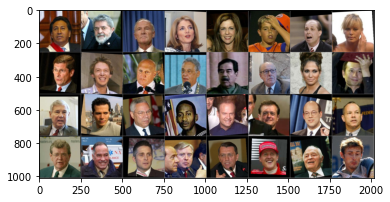

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5 #unnormalize
  plt.imshow(np.transpose(img.numpy(), (1,2,0)))

trainiter = iter(trainloader)
images, labels = trainiter.next()

imshow(torchvision.utils.make_grid(images))
for j in range(BATCH_SIZE):
  if (j != 0 and j % 8 == 0): print()
  print(classes[labels[j]].ljust(25), end=" ")
  

###2. Define a Convolutional Neural Network 
The CNN is created from scratch to take 3-channel images.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module): 
    def __init__(self):
      super().__init__()
      #conv1, conv2, fc1, fc2, fc3

    def forward(self, x):
      #...
      return x

###3. Define a loss function and an optimizer
We use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim 


model = ConvNet()
criterion = nn.CrossEntropyLoss()
#criterion = 
#optimizer = 

###4. Train the network on the training data
We have to loop over our data iterator and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(EPOCHS):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      #Zero the parameter gradients
      optimizer.zero_grad()

      #Forward, backward and optimization
      outputs = model(inputs)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 50 == 49:
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 50))
        running_loss = 0.0
print('Finished Training')

###5. Test the network on the test data 
Check if the network has learnt anything at all.